In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
path_data = "../dataset/pjk_dataset.csv"
data = pd.read_csv(path_data)

data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


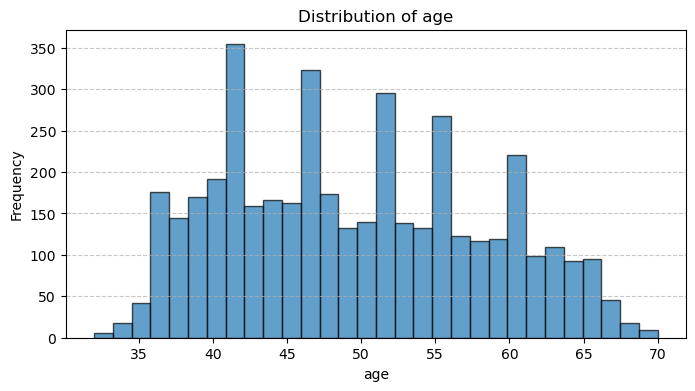

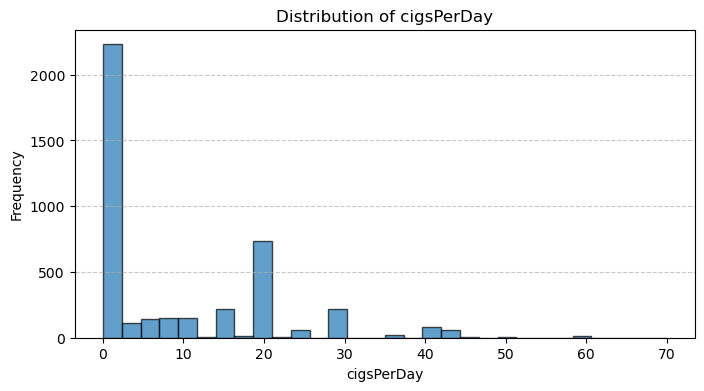

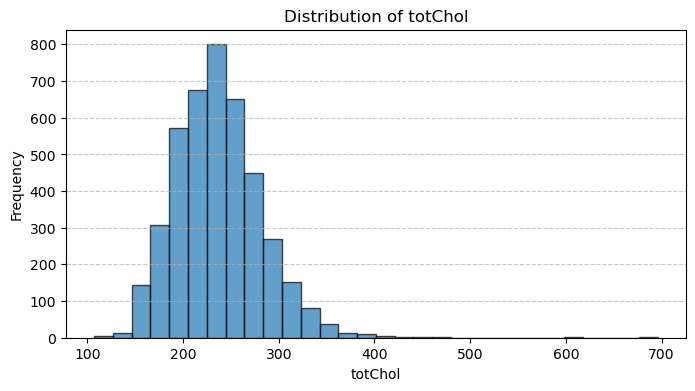

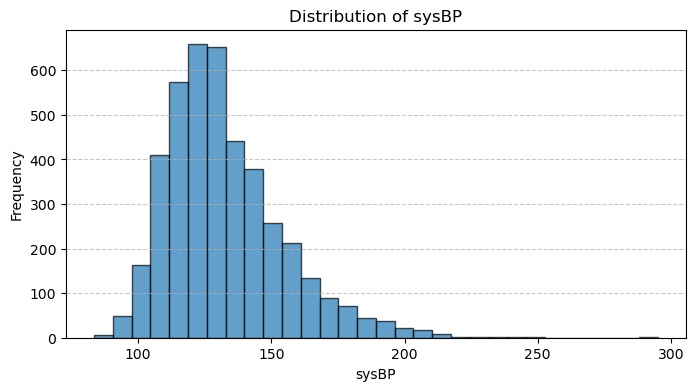

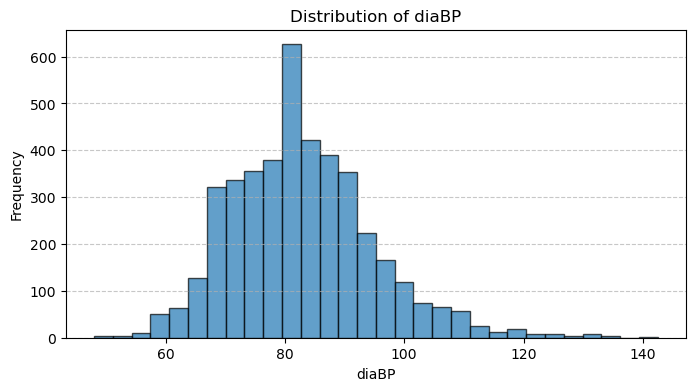

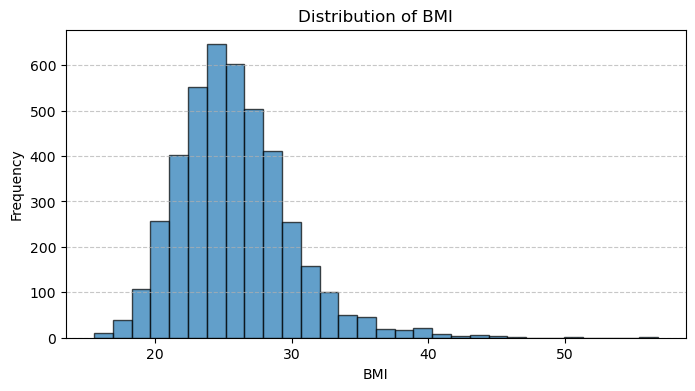

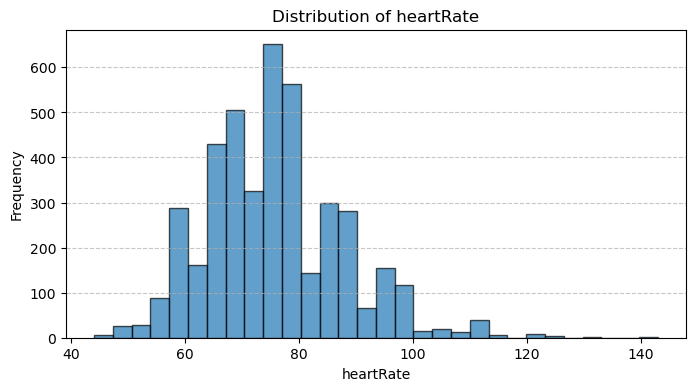

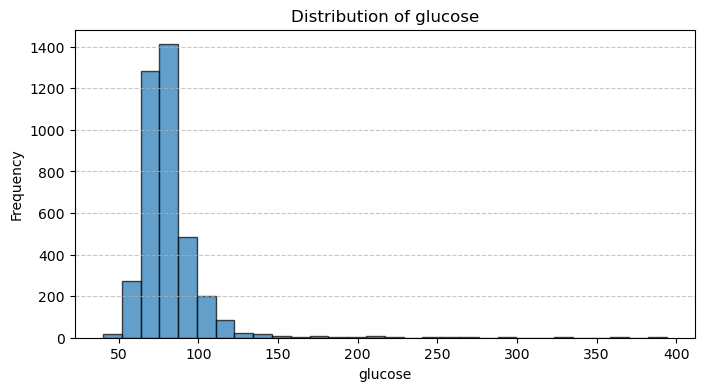

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0.0,2420.0,NaN,2145.0,4063.0,4215.0,2923.0,4131.0,3596.0
1.0,1820.0,1720.0,2095.0,124.0,25.0,1317.0,109.0,644.0
2.0,NaN,1253.0,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,689.0,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,473.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Cek distribusi fitur numerik
numerical_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Cek distribusi fitur kategorikal
categorical_columns = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke',
                       'prevalentHyp', 'diabetes', 'TenYearCHD']

# Plot distribution of numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(data[col].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Summary for categorical columns
categorical_summary = data[categorical_columns].apply(pd.Series.value_counts)

categorical_summary

In [6]:
# Cek null
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
(data.isna().sum()*100)/len(data)

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

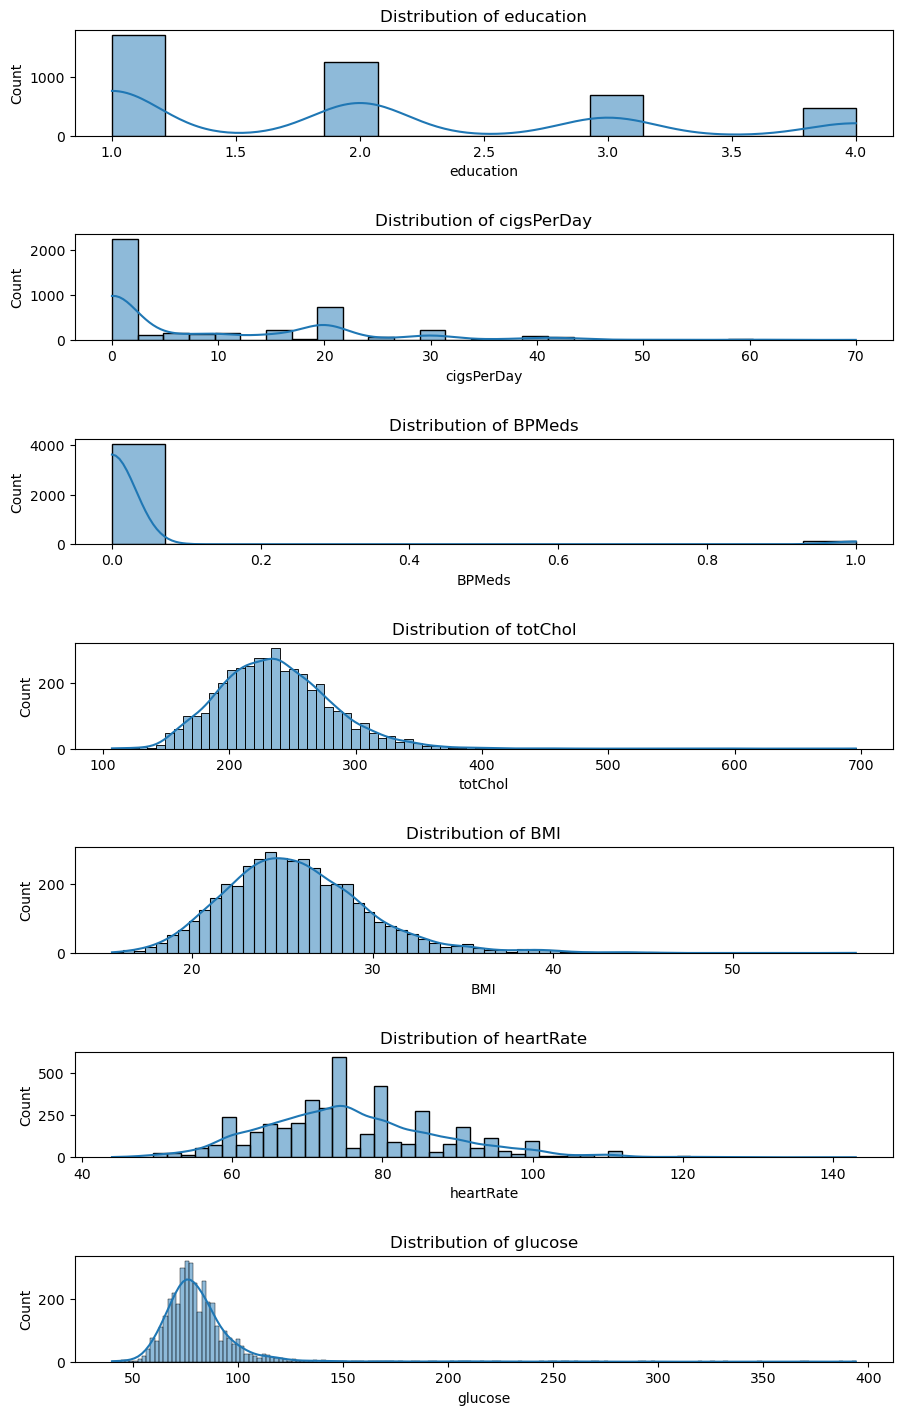

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_with_missing_values = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

# Plotting the distributions of columns with missing values
fig, axes = plt.subplots(len(cols_with_missing_values), 1, figsize=(10, 15))
fig.tight_layout(pad=5.0)

for i, col in enumerate(cols_with_missing_values):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.show()

In [9]:
data.shape

(4240, 16)

Data Prepration

In [10]:
# Fill Missing Value

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Columns to impute
mean_cols = ['heartRate']  # Normally distributed/symmetric variables
median_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']  # Skewed or categorical variables

# Imputers
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

# ColumnTransformer
imputation_transformer = ColumnTransformer(
    transformers=[
        ('mean_imputer', mean_imputer, mean_cols),
        ('median_imputer', median_imputer, median_cols)
    ],
    remainder='passthrough'  # Keep other columns unchanged if any
)

# Use the transformer in a pipeline (optional)
pipeline = Pipeline(steps=[
    ('impute', imputation_transformer)
])

# Apply the transformations
transformed_data = pipeline.fit_transform(data)
transformed_data = pd.DataFrame(transformed_data, columns=data.columns)

data = transformed_data

In [11]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
data.shape

(4240, 16)

In [13]:
# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analisis outlier untuk setiap kolom numerik
outlier_results = {}
for col in numerical_columns:
    outliers, lower, upper = detect_outliers_iqr(data, col)
    outlier_results[col] = {
        "outliers_count": len(outliers),
        "lower_bound": lower,
        "upper_bound": upper
    }

# Menampilkan hasil analisis outlier
outlier_results

{'age': {'outliers_count': 0, 'lower_bound': -2.0, 'upper_bound': 6.0},
 'cigsPerDay': {'outliers_count': 57,
  'lower_bound': 122.0,
  'upper_bound': 346.0},
 'totChol': {'outliers_count': 0, 'lower_bound': -1.5, 'upper_bound': 2.5},
 'sysBP': {'outliers_count': 25, 'lower_bound': 0.0, 'upper_bound': 0.0},
 'diaBP': {'outliers_count': 0, 'lower_bound': -1.5, 'upper_bound': 2.5},
 'BMI': {'outliers_count': 109, 'lower_bound': 0.0, 'upper_bound': 0.0},
 'heartRate': {'outliers_count': 126,
  'lower_bound': 76.5,
  'upper_bound': 184.5},
 'glucose': {'outliers_count': 77, 'lower_bound': 52.5, 'upper_bound': 112.5}}

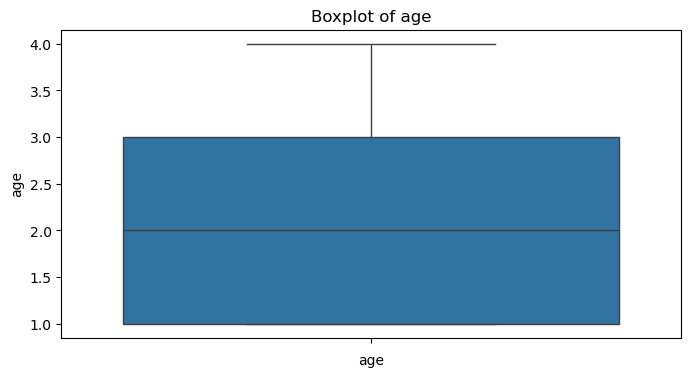

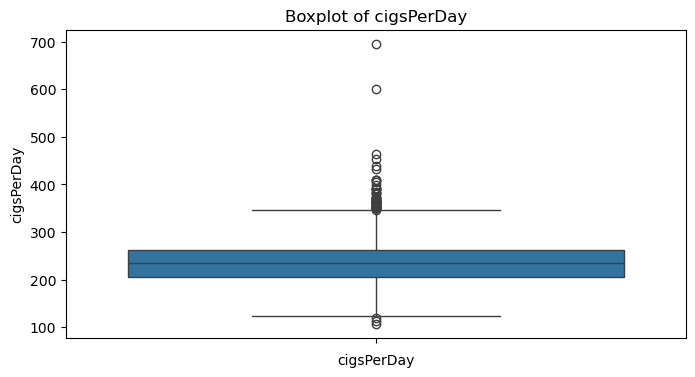

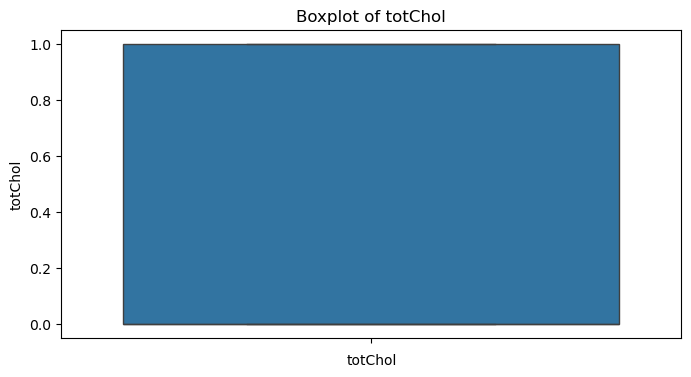

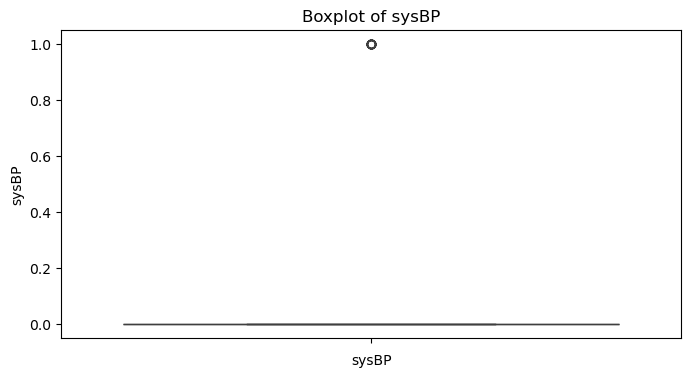

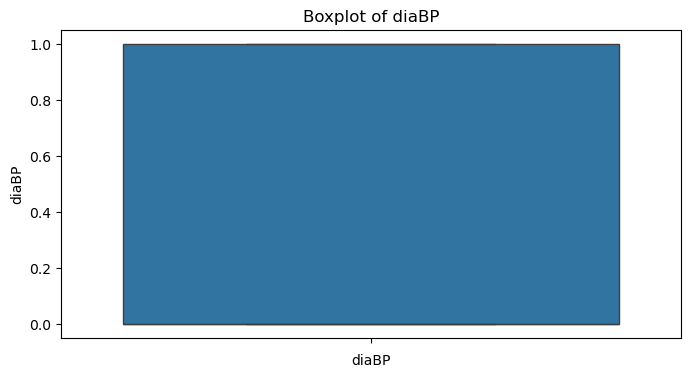

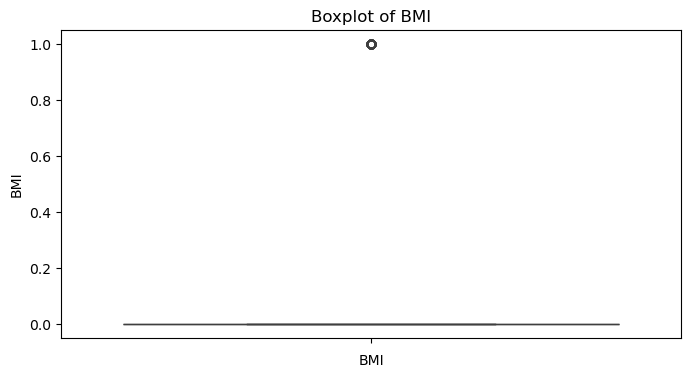

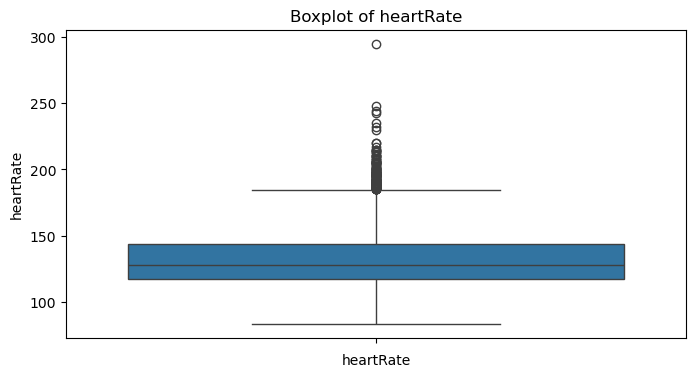

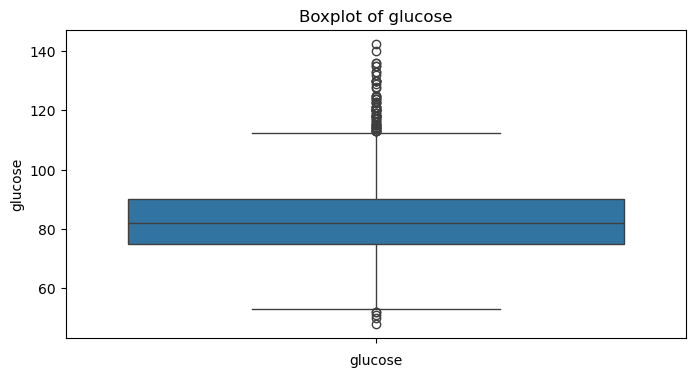

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots to identify outliers for numerical columns
numerical_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Create boxplots for each column
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


In [15]:
def handle_outliers_with_IQR(df, column):
    """ Handle outliers in a dataframe column using the IQR method.
        Values outside 1.5 * IQR from the Q1 and Q3 quartiles are considered outliers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

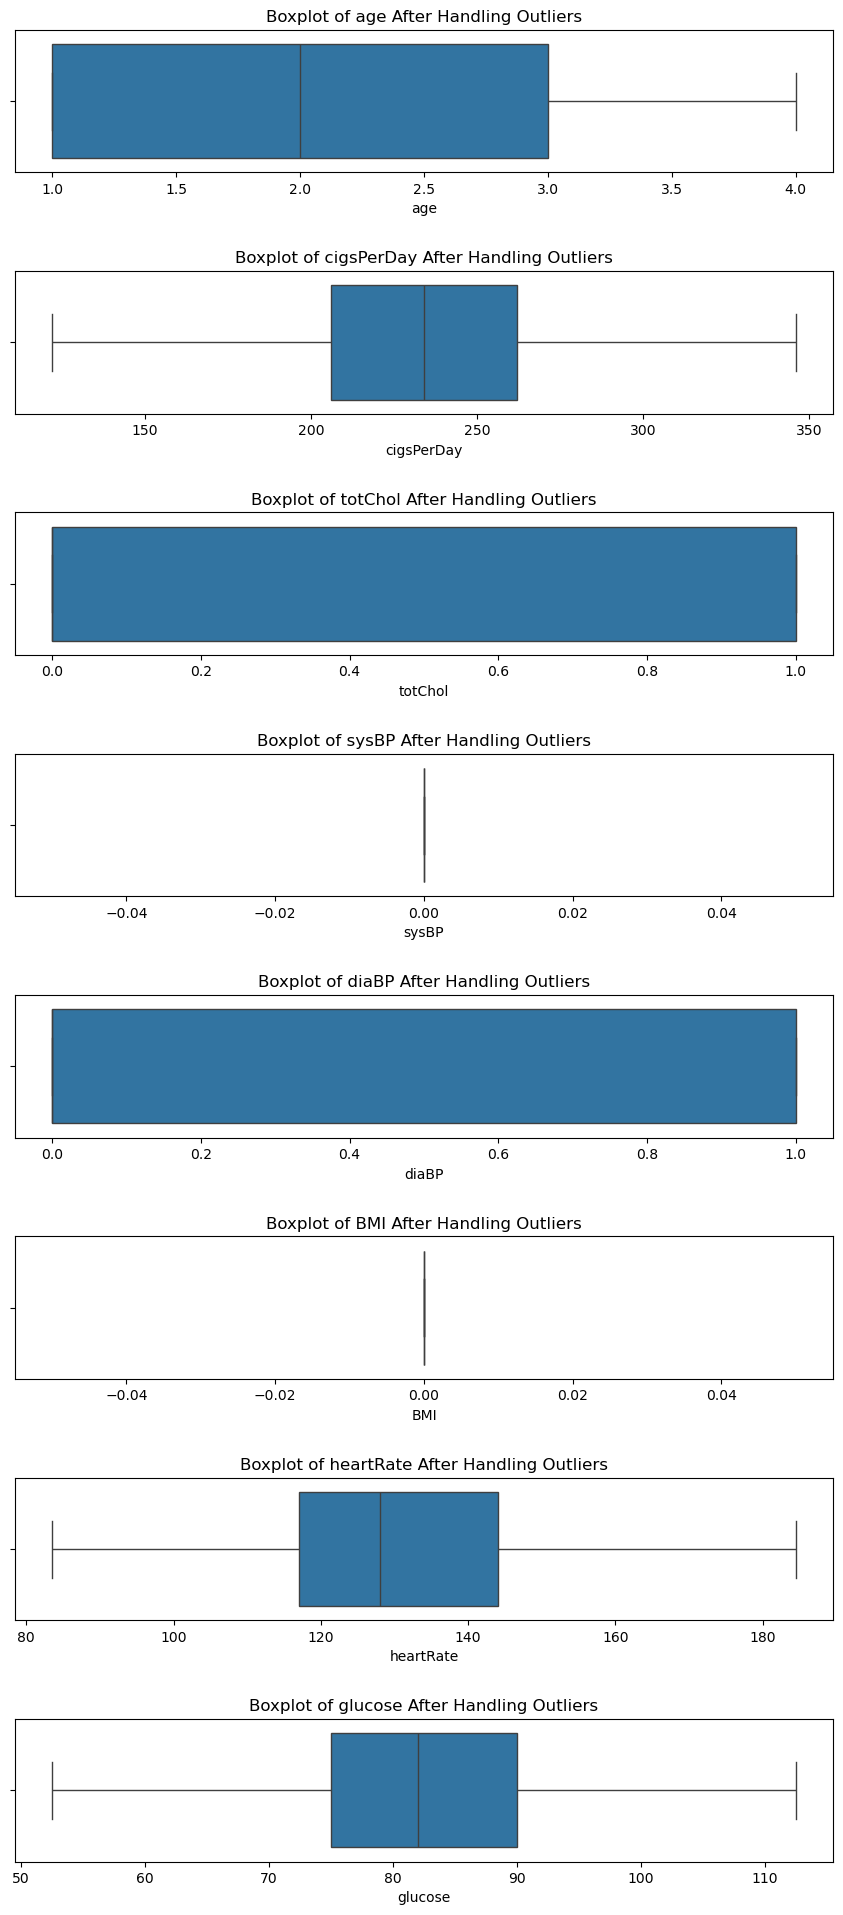

In [16]:
# Applying the IQR method to each continuous column
for col in numerical_columns:
    handle_outliers_with_IQR(data, col)

# Plotting the boxplots for continuous variables after handling outliers
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} After Handling Outliers')
    axes[i].set_xlabel(col)

plt.show()

In [17]:
data.shape

(4240, 16)

Menangani Imbalance Dataset

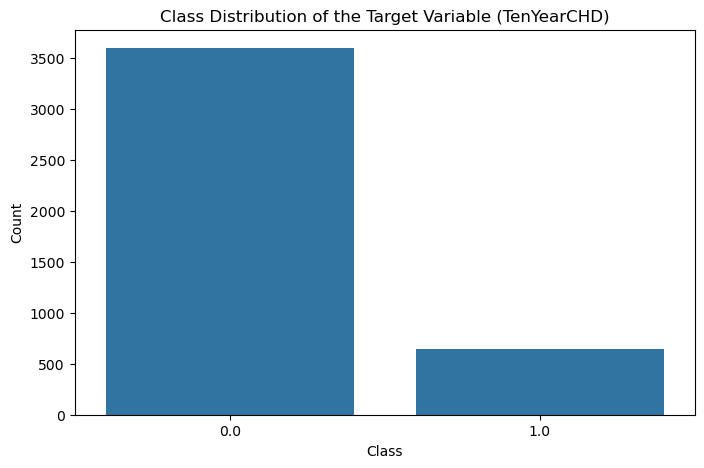

In [18]:
# Checking if the data is imbalanced
target_column = 'TenYearCHD'
class_counts = data[target_column].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution of the Target Variable (TenYearCHD)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [19]:
class_counts

TenYearCHD
0.0    3596
1.0     644
Name: count, dtype: int64

Pemodelan pakai scaler

In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Ini dipakai kalau misalnya nilai nullnya belum dihapus
# data = data.dropna()  # Drop rows with NaN for simplicity

# Splitting features and target
X = data.drop(columns=['TenYearCHD'])
y = data['TenYearCHD']


# # Cek distribusi fitur numerik
# numerical_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# # Cek distribusi fitur kategorikal
# categorical_columns = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke',
#                        'prevalentHyp', 'diabetes', 'TenYearCHD']


# Identifikasi kolom kategorikal dan numerik
categorical_columns = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke',
                       'prevalentHyp', 'diabetes']  # Tambahkan kolom kategorikal lainnya jika ada
numerical_columns = [col for col in X.columns if col not in categorical_columns]

# Bagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Terapkan SMOTE hanya pada fitur numerik
smote = SMOTE(random_state=42)
X_train_numerical_resampled, y_train_resampled = smote.fit_resample(X_train[numerical_columns], y_train)

# Tambahkan kembali kolom kategorikal tanpa perubahan
X_train_categorical_resampled = pd.concat(
    [X_train[categorical_columns].iloc[y_train.index]] * (len(X_train_numerical_resampled) // len(X_train) + 1),
    axis=0
).iloc[:len(X_train_numerical_resampled)].reset_index(drop=True)

# Gabungkan kembali fitur numerik dan kategorikal
X_train_resampled = pd.concat([X_train_categorical_resampled, pd.DataFrame(X_train_numerical_resampled)], axis=1)



IndexError: positional indexers are out-of-bounds

In [21]:
X_train_smote.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,75.0,2.0,18.0,0.0,290.0,18.28,68.0,0.0,46.0,1.0,0.0,0.0,0.0,131.0,84.0
1,75.0,1.0,0.0,0.0,250.0,25.88,91.0,0.0,63.0,0.0,0.0,0.0,0.0,117.5,75.0
2,75.0,1.0,0.0,0.0,220.0,29.85,87.0,1.0,58.0,0.0,0.0,0.0,0.0,143.0,104.0
3,75.0,1.0,40.0,0.0,158.0,21.44,98.0,1.0,44.0,1.0,0.0,0.0,0.0,150.5,87.0
4,110.0,2.0,0.0,0.0,226.0,45.79,78.0,0.0,45.0,0.0,0.0,1.0,0.0,180.0,99.0


In [24]:
# Sort results by Accuracy in descending order
results_sorted = results_df.sort_values(by="Accuracy", ascending=False)
results_sorted

,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Random Forest,0.971508,0.955983,0.987216,0.971349,0.994309
K-Nearest Neighbors,0.784573,0.722851,0.907670,0.804786,0.873945
Gradient Boosting,0.716470,0.689258,0.765625,0.725437,0.793112
Support Vector Machine,0.699097,0.681879,0.721591,0.701173,0.769065
Logistic Regression,0.662265,0.648501,0.676136,0.662031,0.718050


In [25]:
# Identify the best model based on Accuracy
best_model_name = results_sorted.index[0]
best_model = models[best_model_name]
best_model

RandomForestClassifier()

Accuracy: 0.97


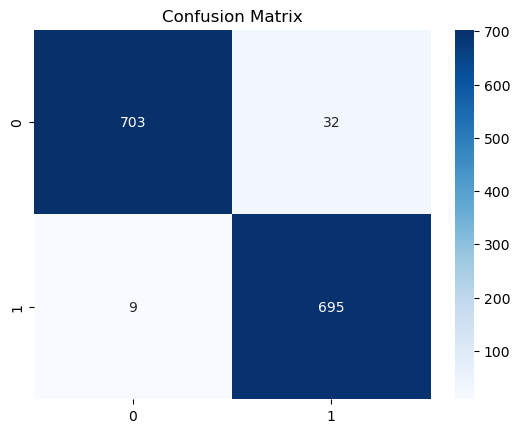

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report


# Predictions
predictions = best_model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [27]:
predictions

array([1., 1., 1., ..., 1., 1., 1.])

In [28]:
# Generate classification report
report = classification_report(y_test, predictions, target_names=["Class 0", "Class 1"])

print(report)

              precision    recall  f1-score   support

     Class 0       0.99      0.96      0.97       735
     Class 1       0.96      0.99      0.97       704

    accuracy                           0.97      1439
   macro avg       0.97      0.97      0.97      1439
weighted avg       0.97      0.97      0.97      1439



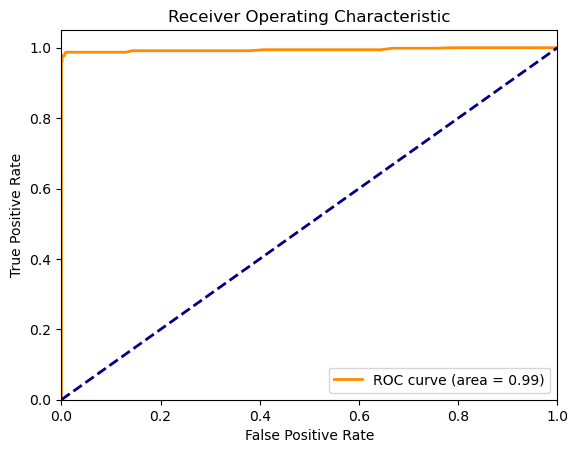

In [29]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [42]:
data_upsampled

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,80.0,4.0,0.0,0.0,195.0,26.97,77.0,1.0,39.0,0.0,0.0,0.0,0.0,106.0,70.0,0.0
1,95.0,2.0,0.0,0.0,250.0,28.73,76.0,0.0,46.0,0.0,0.0,0.0,0.0,121.0,81.0,0.0
2,75.0,1.0,20.0,0.0,245.0,25.34,70.0,1.0,48.0,1.0,0.0,0.0,0.0,127.5,80.0,0.0
4,85.0,3.0,23.0,0.0,285.0,23.10,85.0,0.0,46.0,1.0,0.0,0.0,0.0,130.0,84.0,0.0
5,77.0,2.0,0.0,0.0,228.0,30.30,99.0,0.0,43.0,0.0,0.0,1.0,0.0,180.0,110.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,75.0,2.0,0.0,0.0,219.0,27.93,80.0,1.0,47.0,0.0,0.0,1.0,0.0,132.0,91.0,1.0
2025,83.0,1.0,0.0,0.0,207.0,20.86,75.0,0.0,57.0,0.0,0.0,1.0,0.0,175.0,80.0,1.0
543,100.0,2.0,18.0,0.0,346.0,22.42,90.0,1.0,47.0,1.0,0.0,1.0,0.0,145.0,74.0,1.0
4189,80.0,2.0,20.0,0.0,261.0,20.88,77.0,1.0,54.0,1.0,0.0,0.0,0.0,117.0,74.0,1.0


In [30]:
from sklearn.model_selection import cross_validate

# Perform cross-validation
cv_results = cross_validate(
    best_model,
    X,
    y,
    cv=5,  # 5-fold cross-validation
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=False
)

# Summarize cross-validation results
cv_summary = {
    "Accuracy": cv_results['test_accuracy'].mean(),
    "Precision": cv_results['test_precision'].mean(),
    "Recall": cv_results['test_recall'].mean(),
    "F1-Score": cv_results['test_f1'].mean()
}

cv_summary


{'Accuracy': 0.9733048468019341,
 'Precision': 0.9556603994121893,
 'Recall': 0.9927700509967547,
 'F1-Score': 0.9738381146531182}

Simpan Model Terbaiknya

In [31]:
import joblib

# Simpan model
# Simpan model
joblib.dump(best_model, '../model/model_rf.joblib')
# Simpan scaler
# joblib.dump(scaler, '../model/scaler_standard.pkl')



['../model/model_rf.joblib']

Coba Uji dengan Data Baru

In [45]:
import pandas as pd
import numpy as np
from joblib import load

# Data baru
# 1,39,4,0,0,0,0,0,0,195,106,70,26.97,80,77,0
# 80.0	2.0	20.0	0.0	261.0	20.88	77.0	1.0	54.0	1.0	0.0	0.0	0.0	117.0	74.0
data_baru = pd.DataFrame({
    'male': [80],
    'age': [2],
    'education': [20],
    'currentSmoker': [0],
    'cigsPerDay': [261],
    'BPMeds': [20.88],
    'prevalentStroke': [77],
    'prevalentHyp': [1],
    'diabetes': [54],
    'totChol': [1],
    'sysBP': [300],
    'diaBP': [100],
    'BMI': [50],
    'heartRate': [117],
    'glucose': [74]
})

# Muat scaler yang telah disimpan
scaler = joblib.load('../model/scaler_standard.pkl')
data_transform = scaler.transform(data_baru)

# Muat model yang telah disimpan
model_rf = joblib.load('../model/model_rf.joblib')

# Prediksi hasil menggunakan data baru
y_pred_baru = model_rf.predict(data_transform)

# Buat DataFrame untuk hasil prediksi
hasil_prediksi = data_baru.copy()
hasil_prediksi['Hasil Prediksi'] = y_pred_baru

# # Tampilkan tabel hasil prediksi
hasil_prediksi, y_pred_baru



(   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
 0    80    2         20              0         261   20.88               77   
 
    prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI  heartRate  glucose  \
 0             1        54        1    300    100   50        117       74   
 
    Hasil Prediksi  
 0             1.0  ,
 array([1.]))